In [101]:
import torchvision
from torchvision import transforms
import torch
import os
import numpy as np
from torch import nn
from collections import OrderedDict
from torch.autograd import Variable
import torch.nn.functional as F
import pandas as pd
import torchvision.models as models
import os
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 让torch判断是否使用GPU，建议使用GPU环境，因为会快很多
#DEVICE = torch.device("cpu") 

In [102]:
model = models.resnet50(pretrained=True)#加载预训练的模型，也可以不加载

In [103]:
print(model)#查看renet50的网络结构，如果不修改网络结构来训练自己的模型的话，只需要修改全连接层的输入和输出即可

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [104]:
#参数保存在有序的字典中，那么可以通过查找参数的名字对应的id值，进行冻结
model_dict = model.state_dict()
dict_name = list(model_dict)
for i, p in enumerate(dict_name):
    print(i, p)

0 conv1.weight
1 bn1.weight
2 bn1.bias
3 bn1.running_mean
4 bn1.running_var
5 bn1.num_batches_tracked
6 layer1.0.conv1.weight
7 layer1.0.bn1.weight
8 layer1.0.bn1.bias
9 layer1.0.bn1.running_mean
10 layer1.0.bn1.running_var
11 layer1.0.bn1.num_batches_tracked
12 layer1.0.conv2.weight
13 layer1.0.bn2.weight
14 layer1.0.bn2.bias
15 layer1.0.bn2.running_mean
16 layer1.0.bn2.running_var
17 layer1.0.bn2.num_batches_tracked
18 layer1.0.conv3.weight
19 layer1.0.bn3.weight
20 layer1.0.bn3.bias
21 layer1.0.bn3.running_mean
22 layer1.0.bn3.running_var
23 layer1.0.bn3.num_batches_tracked
24 layer1.0.downsample.0.weight
25 layer1.0.downsample.1.weight
26 layer1.0.downsample.1.bias
27 layer1.0.downsample.1.running_mean
28 layer1.0.downsample.1.running_var
29 layer1.0.downsample.1.num_batches_tracked
30 layer1.1.conv1.weight
31 layer1.1.bn1.weight
32 layer1.1.bn1.bias
33 layer1.1.bn1.running_mean
34 layer1.1.bn1.running_var
35 layer1.1.bn1.num_batches_tracked
36 layer1.1.conv2.weight
37 layer1.1.bn2

In [105]:
print(model.fc)



Linear(in_features=2048, out_features=1000, bias=True)


In [106]:
#model.fc = nn.Linear(2048,33)#只修改最后一层全连接模型，由于我们昆虫数据集只有33个分类


#或者这种写法
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 33)



In [107]:
print(model)#查看模型是否被成果修改

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [108]:
#把模型指定在GPU上运行
#model = model.to(DEVICE)
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [109]:
#读取数据，并对数据进行归一化处理
os.getcwd()

'/data0/zengpz'

In [110]:
picturepath = '/data0/zengpz/insect（我处理）'


In [111]:
import os.path
print(os.path.basename(picturepath))
print(os.path.dirname(picturepath))

import glob

print(glob.glob('/data0/zengpz/insect（我处理）/*'))

insect（我处理）
/data0/zengpz
['/data0/zengpz/insect（我处理）/桑褐刺蛾', '/data0/zengpz/insect（我处理）/绿盲蝽', '/data0/zengpz/insect（我处理）/毛虫', '/data0/zengpz/insect（我处理）/稻蝗', '/data0/zengpz/insect（我处理）/黑绒金龟', '/data0/zengpz/insect（我处理）/红蜘蛛', '/data0/zengpz/insect（我处理）/棉铃虫', '/data0/zengpz/insect（我处理）/二斑叶螨', '/data0/zengpz/insect（我处理）/瓢虫', '/data0/zengpz/insect（我处理）/军配虫', '/data0/zengpz/insect（我处理）/糠片盾蚧', '/data0/zengpz/insect（我处理）/吊丝虫', '/data0/zengpz/insect（我处理）/桉蓑蛾', '/data0/zengpz/insect（我处理）/大蓑蛾', '/data0/zengpz/insect（我处理）/菊天牛', '/data0/zengpz/insect（我处理）/褐软蚧', '/data0/zengpz/insect（我处理）/短额负蝗', '/data0/zengpz/insect（我处理）/柑橘粉蚧', '/data0/zengpz/insect（我处理）/条华蜗牛', '/data0/zengpz/insect（我处理）/蚧壳虫', '/data0/zengpz/insect（我处理）/稻绿蝽', '/data0/zengpz/insect（我处理）/灰巴蜗牛', '/data0/zengpz/insect（我处理）/吹绵蚧', '/data0/zengpz/insect（我处理）/蛞蝓', '/data0/zengpz/insect（我处理）/蓟马', '/data0/zengpz/insect（我处理）/白粉虱', '/data0/zengpz/insect（我处理）/红脚绿金龟', '/data0/zengpz/insect（我处理）/菜粉蝶', '/data0/zengpz/insect（我处理）/红蜡蚧', '/data0/zen

In [112]:
list_dir = [i for i in glob.glob('/data0/zengpz/insect（我处理）/*')]
print(len(list_dir))
#show其中一张图片的路径
list_dir_ =[]
for i in range(len(list_dir)):
    list_dir_ .append(list_dir[i].split('/')[4])
print(list_dir_)
print(len(list_dir_))#可以看到一共33个类

33
['桑褐刺蛾', '绿盲蝽', '毛虫', '稻蝗', '黑绒金龟', '红蜘蛛', '棉铃虫', '二斑叶螨', '瓢虫', '军配虫', '糠片盾蚧', '吊丝虫', '桉蓑蛾', '大蓑蛾', '菊天牛', '褐软蚧', '短额负蝗', '柑橘粉蚧', '条华蜗牛', '蚧壳虫', '稻绿蝽', '灰巴蜗牛', '吹绵蚧', '蛞蝓', '蓟马', '白粉虱', '红脚绿金龟', '菜粉蝶', '红蜡蚧', '埃及吹棉介壳虫', '根结线虫', '考氏白盾蚧', '木虱']
33


In [113]:
from PIL import Image
#files = sorted(glob.glob('/data0/zengpz/insect（我处理）/桑褐刺蛾/*.jpg'))

files = sorted(glob.glob('/data0/zengpz/insect（我处理）/*/*.jpg'))

#print(files[32])
print(len(files))
#print(files)
#t = '/data0/zengpz/insect（我处理）/桑褐刺蛾/1.jpg'
#t in files


972


In [114]:
#查看显示某一张图片
from PIL import Image
files = sorted(glob.glob('/data0/zengpz/insect（我处理）/*/*.jpg'))
#im = Image.open(r'list_dir[0]/')
#im.show()
image_labels = []
filespath =[]
for file in files:  
    image_labels.append(file.split('/')[4])
    filespath.append(file)
    
print(len(filespath))#一共972张照片
print(len(image_labels))

#把路径和label存成dataframe的形式
from pandas import Series,DataFrame
import pandas as pd

df = DataFrame()
df['insectdir'] = filespath
df['insectlabel'] = image_labels

print(df.head())

#保存成csv文件，便于之后使用
#
#df.to_csv('insect_dataread.csv')

972
972
                                insectdir insectlabel
0    /data0/zengpz/insect（我处理）/二斑叶螨/1.jpg        二斑叶螨
1   /data0/zengpz/insect（我处理）/二斑叶螨/13.jpg        二斑叶螨
2  /data0/zengpz/insect（我处理）/二斑叶螨/133.jpg        二斑叶螨
3   /data0/zengpz/insect（我处理）/二斑叶螨/14.jpg        二斑叶螨
4   /data0/zengpz/insect（我处理）/二斑叶螨/15.jpg        二斑叶螨


In [115]:
#把数据随机按照比例1:10划分训练集和测试集
test_index = range(0,972,9) 
train_index = []

for i in range(0,972):
    if i not in test_index:
        train_index.append(i)

train = df.iloc[train_index,:]
test = df.iloc[test_index,:]

print(len(train))
print(len(test))
#保存train数据
#train.to_csv('insect_train.csv')
#test.to_csv('insect_test.csv')

864
108


In [116]:
#对原始图片的预处理
from torchvision import transforms as transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.RandomRotation((-45,45)), #随机旋转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.229, 0.224, 0.225)), #R,G,B每层的归一化用到的均值和方差
])

In [117]:
from torch.utils.data import Dataset
from PIL import Image


#定义一个数据集
class myDataset(Dataset):
    """ 数据集演示 """
    def __init__(self, csv_file):
        """实现初始化方法，在初始化的时候将数据读载入"""
        self.df=pd.read_csv(csv_file)
        self.tags = {"埃及吹棉介壳虫": 0,
                "桉蓑蛾": 1,
                "白粉虱": 2,
                "菜粉蝶": 3,
                "吹绵蚧": 4,
                "大蓑蛾": 5,
                "稻蝗": 6,
                "稻绿蝽": 7,
                "吊丝虫": 8,
                '短额负蝗':9,
                '二斑叶螨':10,
                '柑橘粉蚧':11,
                '根结线虫':12,
                '褐软蚧':13,
                '黑绒金龟':14,
                '红脚绿金龟':15,
                '红蜡蚧':16,
                '红蜘蛛':17,
                '灰巴蜗牛':18,
                '蓟马':19,
                '蚧壳虫':20,
                '菊天牛':21,
                '军配虫':22,
                '糠片盾蚧':23,
                '考氏白盾蚧':24,
                '蛞蝓':25,
                '绿盲蝽':26,
                '毛虫':27,
                '棉铃虫':28,
                '木虱':29,
                '瓢虫':30,
                '桑褐刺蛾':31,
                '条华蜗牛':32
                }
        
    def __len__(self):
        '''
        返回df的长度
        '''
        return len(self.df)
    def __getitem__(self, idx):
        '''
        根据 idx 返回一行数据
        
        '''
        img = Image.open(self.df.iloc[idx].insectdir).convert('RGB')
        label = self.df.iloc[idx].insectlabel
        label = self.tags[label]
        img_path = self.df.iloc[idx].insectdir
        #把图片做归一化处理
        img = transform(img)
        return img,label,img_path

#修改读取的文件的路径    
#ds_demo= myDataset('insect_dataread.csv')
train_data =  myDataset('insect_train.csv')
test_data = myDataset('insect_test.csv')
print(len(train_data))
print(len(test_data))

864
108


In [118]:
train_data[1]#用索引可以直接访问对应的数据, 对应 __getitem__ 方法

(tensor([[[-0.8786, -0.8272, -0.8101,  ..., -0.2621, -0.2450, -0.2108],
          [-0.8615, -0.8444, -0.8272,  ..., -0.2279, -0.2108, -0.1765],
          [-0.8615, -0.8444, -0.8272,  ..., -0.1936, -0.1594, -0.1423],
          ...,
          [ 0.2516, -0.1936, -0.6902,  ..., -0.5875, -0.6046, -0.7074],
          [ 0.1489, -0.3135, -0.6046,  ..., -0.5190, -0.5875, -0.7416],
          [ 0.0290, -0.3649, -0.4676,  ..., -0.4334, -0.5361, -0.7416]],
 
         [[-0.4720, -0.4545, -0.4545,  ...,  0.1582,  0.1933,  0.2108],
          [-0.4895, -0.4720, -0.4720,  ...,  0.1933,  0.2283,  0.2458],
          [-0.4895, -0.4720, -0.4720,  ...,  0.2283,  0.2458,  0.2808],
          ...,
          [ 0.7360,  0.2633, -0.2444,  ..., -0.2794, -0.3144, -0.4195],
          [ 0.6484,  0.1582, -0.1569,  ..., -0.2269, -0.2969, -0.4545],
          [ 0.5084,  0.0882, -0.0168,  ..., -0.1569, -0.2444, -0.4545]],
 
         [[-1.2524, -1.2524, -1.2524,  ..., -0.4681, -0.3810, -0.3287],
          [-1.2524, -1.2698,

In [119]:
train_data[1][0].shape  #可以看到输入的图片已经做了归一化处理了

torch.Size([3, 224, 224])

In [120]:
'''
#测试一下是否真的有33类数据来训练
list_ = []
for i in range(0,864):
    list_.append(train_data[i][1])
    if train_data[i][1] < 0 or train_data[i][1] > 32:
        print(test_data[i][2])
print(len(set(list_)))
set(list_)
'''

'\n#测试一下是否真的有33类数据来训练\nlist_ = []\nfor i in range(0,864):\n    list_.append(train_data[i][1])\n    if train_data[i][1] < 0 or train_data[i][1] > 32:\n        print(test_data[i][2])\nprint(len(set(list_)))\nset(list_)\n'

In [121]:

#使用官方提供的数据载入器，读取数据
#常用参数有：batch_size(每个batch的大小), shuffle(是否进行shuffle操作), num_workers(加载数据的时候使用几个子进程)
train_ = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True, num_workers=0)
test_ = torch.utils.data.DataLoader(test_data, batch_size=8, shuffle=True, num_workers=0)

#DataLoader返回的是一个可迭代对象，我们可以使用迭代器分次获取数据
#idata=iter(train)
#print(next(idata))

In [122]:
#冻结网络部分参数
'''
for i,p in enumerate(model.parameters()):
    if i < 200:
        p.requires_grad = False
'''
#loss function and optimizer
criterion=torch.nn.CrossEntropyLoss()
#parameters only train the last fc layer
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

#optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)
#optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

In [123]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def trainmodel(model,train_loader,optimizer, epoch):
    model.train()
    for batch_idx, (inputs_, labels_, _) in enumerate(train_loader):
    #for batch_idx, (data, target) in enumerate(train_loader):
        #data, target = data.to(device), target.to(device)
        
        #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        #inputs = inputs.to(device)#用GPU训练
        #labels = labels.to(device)
        
        
        cuda = torch.device('cuda') 
        #直接用torch.tensor会有warning
        inputs = torch.tensor(inputs_).cuda()
        labels = torch.tensor(labels_).cuda()
        #inputs = inputs_.clone().detach().requires_grad_(True)
        #labels = labels_.clone().detach()
        
        
        #inputs = inputs.to(device)#用GPU训练
        #labels = labels.to(device)
        #inputs = inputs.cpu()
        #labels = labels.cpu()
        
        
        optimizer.zero_grad()
        output = model(inputs)
        
        #loss = F.nll_loss(output, target)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        if(batch_idx+1)%30 == 0: 
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(inputs_), len(train_loader)*len(inputs_),
                100. * batch_idx / len(train_loader), loss.item()))
    

In [124]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
accuracy = []
def testmodel(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i, (inputs, labels, _) in enumerate(test_loader):
            
            cuda = torch.device('cuda') 
            #这样有warning
            data = torch.tensor(inputs).cuda()
            target = torch.tensor(labels).cuda()
            #data = inputs.clone().detach().requires_grad_(True)
            #target = labels.clone().detach
            
            
            #device = torch.device("cuda")
            #data, target = data.to(device), target.to(device)
            #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            
            data, target = data.to(device), target.to(device)
            #data, target = data.cpu(), target.cpu()
            
            output = model(data)
            test_loss += criterion(output, target).item() # 将一批的损失相加
            pred = output.max(1, keepdim=True)[1] # 找到概率最大的下标
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    accuracy.append(100. * correct / (len(inputs)*len(test_loader)))
    if 100. * correct / (len(inputs)*len(test_loader)) >= max(accuracy):
        torch.save(model.state_dict,'resnet50_insect_own_parameters.pkl')
    test_loss /= len(inputs)*len(test_loader)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(inputs)*len(test_loader),
        100. * correct / (len(inputs)*len(test_loader))))



In [127]:
import warnings
warnings.filterwarnings('ignore')
#开始训练过程
EPOCHS = 100
for epoch in range(1, EPOCHS + 1):
    trainmodel(model, train_, optimizer, epoch)
    testmodel(model,test_)
print('最好的识别率：',max(accuracy))

Train Epoch: 1 [232/864 (27%)]	Loss: 2.955364
Train Epoch: 1 [472/864 (55%)]	Loss: 2.687227
Train Epoch: 1 [712/864 (82%)]	Loss: 2.690779

Test set: Average loss: 0.8658, Accuracy: 17/56 (30%)

Train Epoch: 2 [232/864 (27%)]	Loss: 3.211566
Train Epoch: 2 [472/864 (55%)]	Loss: 2.780124
Train Epoch: 2 [712/864 (82%)]	Loss: 2.807317

Test set: Average loss: 0.7664, Accuracy: 18/56 (32%)

Train Epoch: 3 [232/864 (27%)]	Loss: 3.268354
Train Epoch: 3 [472/864 (55%)]	Loss: 3.266315
Train Epoch: 3 [712/864 (82%)]	Loss: 3.180798

Test set: Average loss: 0.8054, Accuracy: 17/56 (30%)

Train Epoch: 4 [232/864 (27%)]	Loss: 3.622007
Train Epoch: 4 [472/864 (55%)]	Loss: 3.511032
Train Epoch: 4 [712/864 (82%)]	Loss: 2.938801

Test set: Average loss: 0.7595, Accuracy: 21/56 (38%)

Train Epoch: 5 [232/864 (27%)]	Loss: 3.650795
Train Epoch: 5 [472/864 (55%)]	Loss: 2.410575
Train Epoch: 5 [712/864 (82%)]	Loss: 2.633882

Test set: Average loss: 0.7615, Accuracy: 20/56 (36%)

Train Epoch: 6 [232/864 (27%)]

Train Epoch: 43 [232/864 (27%)]	Loss: 2.019795
Train Epoch: 43 [472/864 (55%)]	Loss: 1.981731
Train Epoch: 43 [712/864 (82%)]	Loss: 1.889513

Test set: Average loss: 0.5528, Accuracy: 40/56 (71%)

Train Epoch: 44 [232/864 (27%)]	Loss: 1.878235
Train Epoch: 44 [472/864 (55%)]	Loss: 1.606584
Train Epoch: 44 [712/864 (82%)]	Loss: 1.688964

Test set: Average loss: 0.5995, Accuracy: 44/56 (79%)

Train Epoch: 45 [232/864 (27%)]	Loss: 1.346582
Train Epoch: 45 [472/864 (55%)]	Loss: 1.613145
Train Epoch: 45 [712/864 (82%)]	Loss: 2.225943

Test set: Average loss: 0.6242, Accuracy: 38/56 (68%)

Train Epoch: 46 [232/864 (27%)]	Loss: 1.230472
Train Epoch: 46 [472/864 (55%)]	Loss: 1.236927
Train Epoch: 46 [712/864 (82%)]	Loss: 2.661185

Test set: Average loss: 0.5929, Accuracy: 40/56 (71%)

Train Epoch: 47 [232/864 (27%)]	Loss: 2.033680
Train Epoch: 47 [472/864 (55%)]	Loss: 1.887269
Train Epoch: 47 [712/864 (82%)]	Loss: 1.920817

Test set: Average loss: 0.6298, Accuracy: 40/56 (71%)

Train Epoch: 48


Test set: Average loss: 0.6901, Accuracy: 48/56 (86%)

Train Epoch: 85 [232/864 (27%)]	Loss: 0.496396
Train Epoch: 85 [472/864 (55%)]	Loss: 0.427734
Train Epoch: 85 [712/864 (82%)]	Loss: 0.845199

Test set: Average loss: 0.7080, Accuracy: 53/56 (95%)

Train Epoch: 86 [232/864 (27%)]	Loss: 0.717840
Train Epoch: 86 [472/864 (55%)]	Loss: 0.462662
Train Epoch: 86 [712/864 (82%)]	Loss: 0.704701

Test set: Average loss: 0.7167, Accuracy: 46/56 (82%)

Train Epoch: 87 [232/864 (27%)]	Loss: 0.811616
Train Epoch: 87 [472/864 (55%)]	Loss: 0.615898
Train Epoch: 87 [712/864 (82%)]	Loss: 0.856615

Test set: Average loss: 0.8081, Accuracy: 47/56 (84%)

Train Epoch: 88 [232/864 (27%)]	Loss: 1.045968
Train Epoch: 88 [472/864 (55%)]	Loss: 0.684165
Train Epoch: 88 [712/864 (82%)]	Loss: 0.496303

Test set: Average loss: 0.6745, Accuracy: 44/56 (79%)

Train Epoch: 89 [232/864 (27%)]	Loss: 0.811421
Train Epoch: 89 [472/864 (55%)]	Loss: 0.528530
Train Epoch: 89 [712/864 (82%)]	Loss: 0.690618

Test set: Aver

Text(0,0.5,'accuracy')

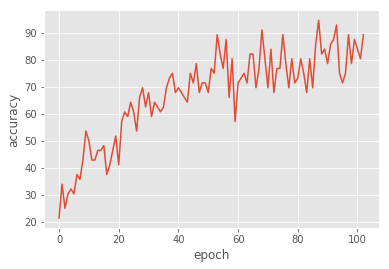

In [132]:
#画出准确率随着epoch的变化而变化的图
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(range(0,100),accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')